In this notebook I am exploring the Alibaba dataset at trace level. I am using just one part of the dataset since it required a lot of time (9+ hours). Results are:

Mean number of calls per trace:  40.4752271926195  standard deviation:  126.40080685607592

Median number of calls per trace:  10.0

Mean number of entities per trace:  11.421582149479718  standard deviation:  14.665507421840605

Median number of entities per trace:  7.0

In [1]:
import pandas as pd
import numpy as np
import os
from statistics import mean,median,stdev
import matplotlib.pyplot as plt
import zipfile
from tqdm import tqdm


In [2]:

# Specify the path of the zip archive
zip_file_path = 'MSCallGraph_0_traces_exploration.zip'

# Create a ZipFile object
zip_file = zipfile.ZipFile(zip_file_path)

# Extract all the files in the archive to a folder
zip_file.extractall('')

# Close the ZipFile object
zip_file.close()


In [3]:
df = pd.read_csv(f'MSCallGraph_0_traces_exploration.csv')
df

,traceid,um,dm
0,0b133c1915919238193454000e5d37,5cca70246befb1f4c9546d2912b9419dee54439218efa5...,b1dbd3a649a3cc790fa12573c9c1aa00988e07a8818a22...
1,0b133c1915919238193454000e5d37,5cca70246befb1f4c9546d2912b9419dee54439218efa5...,b1dbd3a649a3cc790fa12573c9c1aa00988e07a8818a22...
2,0b133c1915919238193454000e5d37,5cca70246befb1f4c9546d2912b9419dee54439218efa5...,b1dbd3a649a3cc790fa12573c9c1aa00988e07a8818a22...
3,0b133c1915919238193454000e5d37,5cca70246befb1f4c9546d2912b9419dee54439218efa5...,b1dbd3a649a3cc790fa12573c9c1aa00988e07a8818a22...
4,0b133c1915919238193454000e5d37,5cca70246befb1f4c9546d2912b9419dee54439218efa5...,b1dbd3a649a3cc790fa12573c9c1aa00988e07a8818a22...
...,...,...,...
5282255,0b52069415919238409694000ea18b,75e56c8fbb9336eb4dd40f5f609d5344203d374d73fd0b...,9a9e8613b6d7d1b573ba38dba19eec9c3cc460ab00cb49...
5282256,0b52069415919238409694000ea18b,614c66b178d3cfe299b11254ecb4321f85beca4b2ccac8...,9a9e8613b6d7d1b573ba38dba19eec9c3cc460ab00cb49...
5282257,0b52069415919238409694000ea18b,614c66b178d3cfe299b11254ecb4321f85beca4b2ccac8...,4bba5c2371c3384862e69615979c2aa5b7f1b4fc3ea914...
5282258,0b52069415919238409694000ea18b,175834ec8169f3bd8afd2382d063d7f4f6815d7c6c8839...,9a9e8613b6d7d1b573ba38dba19eec9c3cc460ab00cb49...


In [4]:
df.nunique()

traceid    130506
um           1474
dm           7326
dtype: int64

In [5]:
mean_calls_per_trace = len(df)/len(set(df['traceid']))
print("Mean number of calls per trace: ",mean_calls_per_trace)

Mean number of calls per trace:  40.4752271926195


In [6]:
traces = list(set(df['traceid']))
import random
random.seed(1234)
random.shuffle(traces)
traces_calls = []
traces_entities = []

In [7]:
traces = traces[:int(len(traces)*1)]
len(traces)

130506

In [8]:
df = df[df['traceid'].isin(set(traces))]
df

,traceid,um,dm
0,0b133c1915919238193454000e5d37,5cca70246befb1f4c9546d2912b9419dee54439218efa5...,b1dbd3a649a3cc790fa12573c9c1aa00988e07a8818a22...
1,0b133c1915919238193454000e5d37,5cca70246befb1f4c9546d2912b9419dee54439218efa5...,b1dbd3a649a3cc790fa12573c9c1aa00988e07a8818a22...
2,0b133c1915919238193454000e5d37,5cca70246befb1f4c9546d2912b9419dee54439218efa5...,b1dbd3a649a3cc790fa12573c9c1aa00988e07a8818a22...
3,0b133c1915919238193454000e5d37,5cca70246befb1f4c9546d2912b9419dee54439218efa5...,b1dbd3a649a3cc790fa12573c9c1aa00988e07a8818a22...
4,0b133c1915919238193454000e5d37,5cca70246befb1f4c9546d2912b9419dee54439218efa5...,b1dbd3a649a3cc790fa12573c9c1aa00988e07a8818a22...
...,...,...,...
5282255,0b52069415919238409694000ea18b,75e56c8fbb9336eb4dd40f5f609d5344203d374d73fd0b...,9a9e8613b6d7d1b573ba38dba19eec9c3cc460ab00cb49...
5282256,0b52069415919238409694000ea18b,614c66b178d3cfe299b11254ecb4321f85beca4b2ccac8...,9a9e8613b6d7d1b573ba38dba19eec9c3cc460ab00cb49...
5282257,0b52069415919238409694000ea18b,614c66b178d3cfe299b11254ecb4321f85beca4b2ccac8...,4bba5c2371c3384862e69615979c2aa5b7f1b4fc3ea914...
5282258,0b52069415919238409694000ea18b,175834ec8169f3bd8afd2382d063d7f4f6815d7c6c8839...,9a9e8613b6d7d1b573ba38dba19eec9c3cc460ab00cb49...


In [10]:

with tqdm(total=len(traces)) as progress_bar:
    for trace in traces:
        trace_df = df[df['traceid']==trace]
        traces_calls.append(len(trace_df))
        traces_entities.append(len(set(trace_df['dm']) | set(trace_df['um'])))
        progress_bar.update(1)


In [ ]:
calls_df = pd.DataFrame(traces_calls,columns=['Traces Calls'])
calls_df

In [ ]:
calls_df.to_csv('MSCallGraph_0_traces_calls.csv',index=False)

In [2]:
calls_df=pd.read_csv('MSCallGraph_0_traces_calls.csv')
calls_df

,Traces Calls
0,13
1,367
2,4
3,10
4,14
...,...
130501,2
130502,4
130503,3
130504,7


In [ ]:
entities_df = pd.DataFrame(traces_entities,columns=['Traces Entities'])
entities_df

In [ ]:
entities_df.to_csv('MSCallGraph_0_traces_entities.csv',index=False)

In [3]:
entities_df=pd.read_csv('MSCallGraph_0_traces_entities.csv')
entities_df

,Traces Entities
0,8
1,20
2,4
3,7
4,9
...,...
130501,2
130502,3
130503,3
130504,6


In [5]:
traces_calls = list(calls_df['Traces Calls'])
traces_entities = list(entities_df['Traces Entities'])

In [6]:
print("Mean number of calls per trace: ", mean(traces_calls), " standard deviation: ", stdev(traces_calls))
print("Median number of calls per trace: ", median(traces_calls))
print("Mean number of entities per trace: ", mean(traces_entities), " standard deviation: ", stdev(traces_entities))
print("Median number of entities per trace: ", median(traces_entities))

Mean number of calls per trace:  40.4752271926195  standard deviation:  126.40080685607592
Median number of calls per trace:  10.0
Mean number of entities per trace:  11.421582149479718  standard deviation:  14.665507421840605
Median number of entities per trace:  7.0


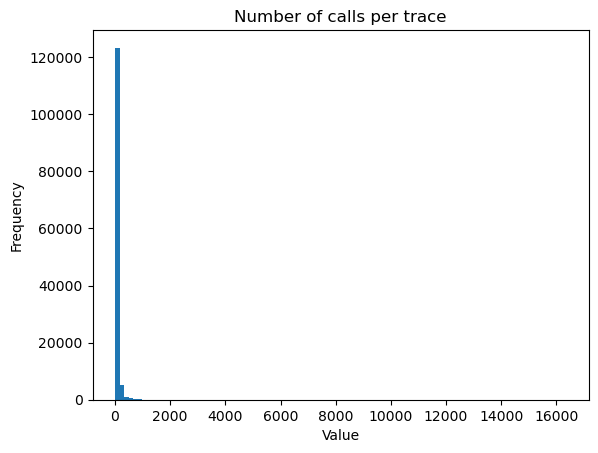

In [7]:
plt.hist(traces_calls,bins=100)
# Set the labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Number of calls per trace')

# Show the plot
plt.show()

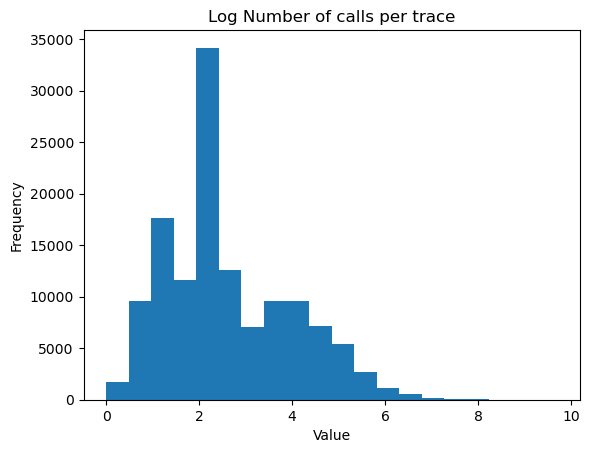

In [8]:
plt.hist(np.log(traces_calls),bins=20)
# Set the labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Log Number of calls per trace')

# Show the plot
plt.show()

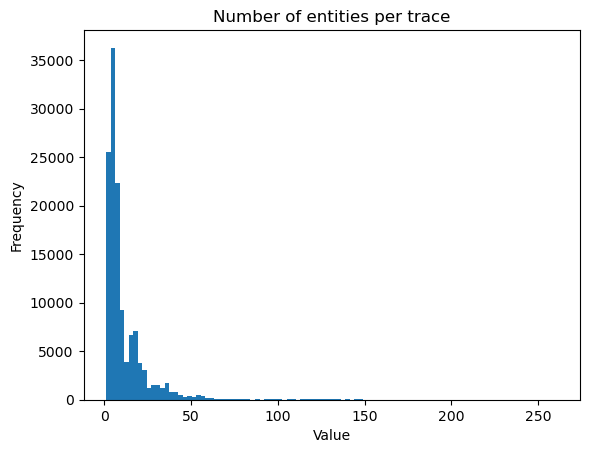

In [9]:
plt.hist(traces_entities,bins=100)
# Set the labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Number of entities per trace')

# Show the plot
plt.show()

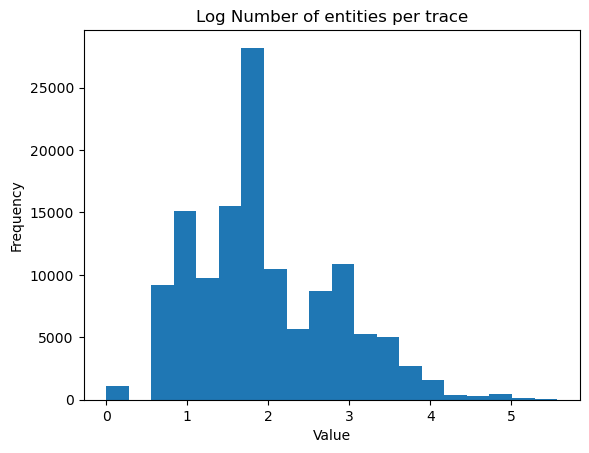

In [10]:
plt.hist(np.log(traces_entities),bins=20)
# Set the labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Log Number of entities per trace')

# Show the plot
plt.show()